**Tohora Whales Detection Model Creation function**

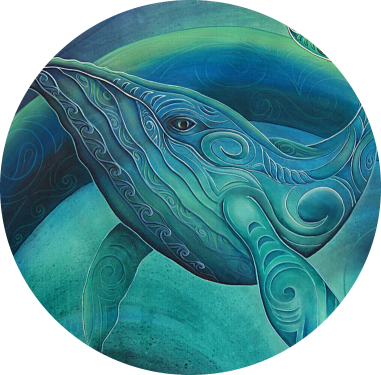

This scripts present the Tohora function which creates and save a ketos based model.

See below for needed parameters.

*(For curious poeple Tohora means Whale in tahitian - official language from French Polynesia)*


In [30]:
pip install ketos

In [4]:
import numpy as np
import tensorflow as tf
import ketos.data_handling.database_interface as dbi
from ketos.neural_networks.resnet import ResNetInterface
from ketos.data_handling.data_feeding import BatchGenerator

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
def tohora(db_path, db_name, recipe_file, chk_path, tohora_path, tohora_name, spec_file, epochs, verbose):
  # Parameters :
  #   - db_path [string] : path to access to the database (ex : /contents)
  #   - db_name [string] : name of the h5 ketos database file (ex : database.h5)
  #   - recipe_file [string] : complete path to the recipe file 
  #   - chk_path [string] : path to the checkpoint folder
  #   - tohora_path [string] : path where the model will be saved
  #   - tohora_name [string] : model nickname (be creative !)
  #   - spec_file [string] : path to the spec_config file
  #   - epochs [integer] : number of epochs
  #   - verbose [boolean] : comments shown during model training
  if verbose==True: print(">>> Tohora tries to open database : "+ db_path+"/"+db_name)
  db = dbi.open_file(db_path+"/"+db_name, 'r+')
  if verbose==True: print(">>> Database found, train and test subsets creation")
  train_data = dbi.open_table(db, "/train/data")
  test_data = dbi.open_table(db, "/test/data")
  train_generator = BatchGenerator(batch_size=20, data_table=train_data, 
                                  output_transform_func=ResNetInterface.transform_batch,
                                  shuffle=True, refresh_on_epoch_end=True)
  val_generator = BatchGenerator(batch_size=20, data_table=test_data,
                                  output_transform_func=ResNetInterface.transform_batch,
                                  shuffle=True, refresh_on_epoch_end=False)
  if verbose==True: print(">>> Tohora model creation")
  resnet = ResNetInterface.build_from_recipe_file(recipe_file)
  resnet.train_generator = train_generator
  resnet.val_generator = val_generator
  resnet.checkpoint_dir = chk_path
  if verbose==True :
    print(">>> Tohora model training with "+str(epochs)+" epochs")
    history=resnet.train_loop(n_epochs=epochs, verbose=True)
  else : resnet.train_loop(n_epochs=epochs, verbose=False)
  db.close()
  if verbose==True: print(">>> Saving Tohora model into "+ tohora_path +"/"+ tohora_name+".kt")
  resnet.save_model(tohora_path +"/"+ tohora_name+".kt",audio_repr_file=spec_file)

Tohora model may be created with below script :

In [36]:
db_path="/content/drive/MyDrive/Ketos_ressources"
db_name="5K_database.h5"
recipe_file="/content/drive/MyDrive/Ketos_ressources/recipe.json"
chk_path="/content/drive/MyDrive/Ketos_ressources/checkpoints"
tohora_path="/content/drive/MyDrive/Ketos_ressources"
tohora_name="Tohora"
spec_file="/content/drive/MyDrive/Ketos_ressources/spec_config.json"
epochs=30
verbose=True
model=tohora(db_path, db_name, recipe_file, chk_path, tohora_path, tohora_name, spec_file, epochs, verbose)

>>> Tohora tries to open database : /content/drive/MyDrive/Ketos_ressources/5K_database.h5
>>> Database found, train and test subsets creation
>>> Tohora model creation
>>> Tohora model training with 30 epochs

Epoch: 1 
train_loss: 0.4357295632362366
train_BinaryAccuracy: 0.572 
val_loss: 0.4979120194911957
val_BinaryAccuracy: 0.500 


Epoch: 2 
train_loss: 0.2274133861064911
train_BinaryAccuracy: 0.796 
val_loss: 0.24689704179763794
val_BinaryAccuracy: 0.771 


Epoch: 3 
train_loss: 0.16990935802459717
train_BinaryAccuracy: 0.842 
val_loss: 0.26732397079467773
val_BinaryAccuracy: 0.732 


Epoch: 4 
train_loss: 0.14571605622768402
train_BinaryAccuracy: 0.865 
val_loss: 0.5000006556510925
val_BinaryAccuracy: 0.500 


Epoch: 5 
train_loss: 0.11948303133249283
train_BinaryAccuracy: 0.886 
val_loss: 0.13055990636348724
val_BinaryAccuracy: 0.871 


Epoch: 6 
train_loss: 0.11016657203435898
train_BinaryAccuracy: 0.898 
val_loss: 0.11636467278003693
val_BinaryAccuracy: 0.886 


Epoch: 7 
tra

I'm trying now to use my model to do a simple detection.

Unfortunately it doesn't work. Any help on this would be appreciated.

In [37]:
cd /content/drive/MyDrive/Ketos_ressources/

/content/drive/MyDrive/Ketos_ressources


In [38]:
!python detector.py --model=Tohora.kt --audio_folder=data/audio --input_list=input_list.txt --output=detections.csv

2021-11-29 02:50:12.193620: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Traceback (most recent call last):
  File "detector.py", line 107, in <module>
    audio_loader = AudioFrameLoader(frame=spec_config['duration'], step=args.step_size, path=args.audio_folder, filename=file_list, repres=spec_config)
KeyError: 'duration'
